<a href="https://colab.research.google.com/github/minicks/Deeplearning/blob/main/3.CNN/%5B%EC%9D%98%EB%A3%8C_AI%5D_%ED%98%84%EB%AF%B8%EA%B2%BD_%EC%98%81%EC%83%81_%EB%B6%84%EC%84%9D%EC%9D%84_%ED%86%B5%ED%95%9C_%EC%95%94_%EC%A7%84%EB%8B%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
cd /content/drive/MyDrive/수학·통계를 몰라도 이해할 수 있는 쉬운 딥러닝 코드 소스/[3편] 인간의 시각 처리를 흉내 낸 인공지능 - CNN/[10장] CNN 활용하기/3_10_1_[의료 AI] 현미경 영상 분석을 통한 암 진단

/content/drive/MyDrive/수학·통계를 몰라도 이해할 수 있는 쉬운 딥러닝 코드 소스/[3편] 인간의 시각 처리를 흉내 낸 인공지능 - CNN/[10장] CNN 활용하기/3_10_1_[의료 AI] 현미경 영상 분석을 통한 암 진단


In [4]:
from tensorflow import keras
import data_reader

In [5]:
# 몇 에포크 만큼 학습을 시킬 것인지 결정합니다.
EPOCHS = 20  # 예제 기본값은 20입니다.

In [6]:
# 데이터를 읽어옵니다.
dr = data_reader.DataReader()

Reading Data...
Opening NORMAL/
Opening TUMOR/


Data Read Done!
Training X Size : (3500, 150, 150, 3)
Training Y Size : (3500,)
Test X Size : (875, 150, 150, 3)
Test Y Size : (875,)




In [27]:
# 인공신경망을 제작합니다.
model2 = keras.Sequential([
    keras.layers.Conv2D(16, (3, 3), activation="relu"),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1)
])

In [28]:
# 인공신경망을 컴파일합니다.
model2.compile(optimizer='adam', metrics=['accuracy'],
              loss='binary_crossentropy')

In [29]:
# 인공신경망을 학습시킵니다.
print("\n\n************ TRAINING START ************ ")
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=7)
history2 = model2.fit(dr.train_X, dr.train_Y, epochs=EPOCHS,
                    validation_data=(dr.test_X, dr.test_Y),
                    callbacks=[early_stop])



************ TRAINING START ************ 
Epoch 1/20
110/110 [==============================] - 72s 653ms/step - loss: 0.3600 - accuracy: 0.8631 - val_loss: 0.2322 - val_accuracy: 0.9063
Epoch 2/20
110/110 [==============================] - 71s 649ms/step - loss: 0.3544 - accuracy: 0.8777 - val_loss: 0.2504 - val_accuracy: 0.8743
Epoch 3/20
110/110 [==============================] - 71s 645ms/step - loss: 0.3711 - accuracy: 0.8623 - val_loss: 0.3137 - val_accuracy: 0.8537
Epoch 4/20
110/110 [==============================] - 71s 643ms/step - loss: 0.4253 - accuracy: 0.8517 - val_loss: 0.3246 - val_accuracy: 0.8537
Epoch 5/20
110/110 [==============================] - 70s 638ms/step - loss: 0.2899 - accuracy: 0.8594 - val_loss: 0.2584 - val_accuracy: 0.8743
Epoch 6/20
110/110 [==============================] - 70s 640ms/step - loss: 0.2520 - accuracy: 0.8869 - val_loss: 1.2316 - val_accuracy: 0.7989
Epoch 7/20
110/110 [==============================] - 70s 639ms/step - loss: 0.2839 - 

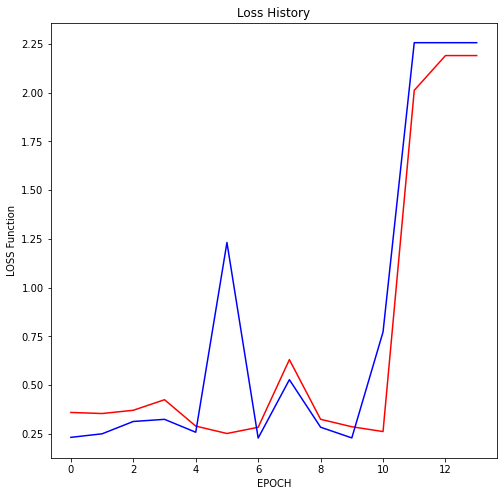

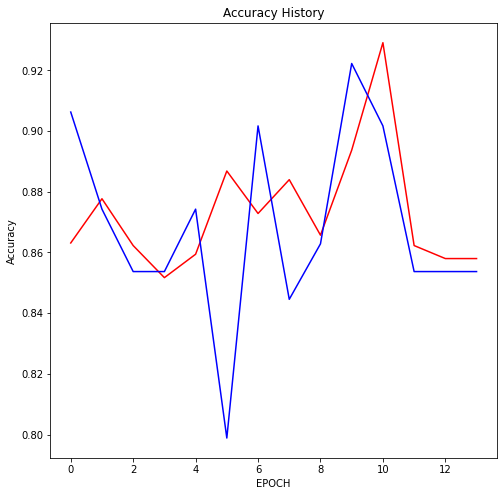

In [30]:
# 학습 결과를 그래프로 출력합니다.
data_reader.draw_graph(history2)